### Question 1

Load the 30 Value Weighted industry portfolio returns. Limit the analysis to returns of the 30 VW portfolios from 1997 onwards (1997 included, 1996 not included, 2018 included). Also load the Market Caps of each of the 30 industries. **Run a backtest of comparing a CapWeighted vs an EW portfolio over the period.** Though these two weighting schemes do not need any estimation, use an **estimation period of 36 months** so that we can compare it in the next few questions.


What was the annualized return over period for the Cap Weighted Industry Portfolio?

### Question 2

Use the same data and period as the previous question.
What was the annualized volatility over the period for the Cap Weighted Industry Portfolio?

### Question 3

Use the same data and period as the previous question.
What was the annualized return over period for the Equal Weighted Industry Portfolio?

### Question 4

Use the same data and period as the previous question.
What was the annualized volatility over the period for the Equal Weighted Industry Portfolio?

In [1]:
import numpy as np
import pandas as pd

import edhec_risk_kit_206 as erk

ind30_rets_97_18 = erk.get_ind_returns(weighting="vw", n_inds=30)["1997":"2018"]
ind30_rets_97_18.head()

,Food,Beer,Smoke,Games,Books,Hshld,Clths,Hlth,Chems,Txtls,...,Telcm,Servs,BusEq,Paper,Trans,Whlsl,Rtail,Meals,Fin,Other
1997-01,0.0289,0.1136,0.0463,0.0359,0.0075,0.0643,0.0644,0.0955,0.0378,0.0550,...,0.0234,0.0576,0.1027,0.0121,0.0240,0.0018,0.0034,0.0161,0.0659,0.0704
1997-02,0.0279,0.0274,0.1247,-0.0026,0.0239,0.0287,0.0312,0.0094,0.0110,0.0221,...,0.0228,-0.0510,-0.0805,0.0480,-0.0106,-0.0089,0.0563,-0.0315,0.0393,-0.0453
1997-03,-0.0120,-0.0653,-0.1354,-0.0320,0.0071,-0.0606,-0.0566,-0.0740,-0.0216,-0.0284,...,-0.0760,-0.0567,-0.0522,-0.0446,-0.0018,-0.0657,-0.0055,0.0165,-0.0663,-0.0430
1997-04,0.0337,0.1137,0.0324,0.0275,-0.0076,0.0845,-0.0410,0.0616,0.0324,-0.0334,...,0.0254,0.1047,0.0602,0.0366,0.0565,0.0054,0.0172,0.0611,0.0623,0.0097
1997-05,0.0257,0.0643,0.0998,0.0560,0.0706,0.0815,0.0501,0.0691,0.0455,0.0725,...,0.0664,0.1001,0.1020,0.0768,0.0612,0.0875,0.0643,0.0098,0.0588,0.0816


In [2]:
ind30_rets_97_18.tail()

,Food,Beer,Smoke,Games,Books,Hshld,Clths,Hlth,Chems,Txtls,...,Telcm,Servs,BusEq,Paper,Trans,Whlsl,Rtail,Meals,Fin,Other
2018-08,-0.0038,-0.0186,-0.0543,0.0289,-0.0447,0.0254,0.0526,0.0446,0.0001,0.0380,...,0.0295,0.0524,0.0993,-0.0034,0.0291,0.0366,0.0911,0.0364,0.0245,0.0299
2018-09,-0.0032,0.0019,0.0537,-0.0009,-0.0221,0.0107,0.0130,0.0199,-0.0287,-0.0638,...,0.0174,-0.0037,-0.0033,-0.0030,0.0105,-0.0148,0.0061,0.0251,-0.0193,0.0116
2018-10,0.0102,-0.0157,0.0790,-0.1596,-0.0666,-0.0051,-0.1014,-0.0884,-0.1250,-0.2579,...,-0.0050,-0.0920,-0.0806,-0.0982,-0.0975,-0.0788,-0.1021,-0.0171,-0.0545,-0.0599
2018-11,0.0272,0.0579,-0.0843,-0.0065,0.0325,0.0644,-0.0099,0.0632,0.0496,0.0292,...,0.0254,0.0129,-0.0505,0.0822,0.0617,0.0318,0.0159,0.0616,0.0289,0.0348
2018-12,-0.0973,-0.0969,-0.1580,-0.0824,-0.1535,-0.0557,-0.0728,-0.0840,-0.0776,-0.1009,...,-0.0884,-0.0765,-0.0923,-0.0863,-0.1519,-0.1121,-0.0919,-0.0628,-0.1144,-0.0693


In [3]:
ind30_mcap_97_18 = erk.get_ind_market_caps(30, weights=True)["1997":"2018"]
ind30_mcap_97_18.head()

,Food,Beer,Smoke,Games,Books,Hshld,Clths,Hlth,Chems,Txtls,...,Telcm,Servs,BusEq,Paper,Trans,Whlsl,Rtail,Meals,Fin,Other
1997-01,0.027453,0.027252,0.014657,0.014549,0.011205,0.025672,0.006593,0.095988,0.028149,0.001899,...,0.065783,0.057842,0.103735,0.023032,0.017045,0.013505,0.048590,0.011023,0.176038,0.013620
1997-02,0.026682,0.028846,0.014576,0.014316,0.010713,0.025952,0.006670,0.099849,0.027762,0.001904,...,0.063793,0.058032,0.108629,0.022150,0.016487,0.012846,0.045951,0.010645,0.177737,0.013857
1997-03,0.027449,0.029690,0.016412,0.014255,0.010974,0.026720,0.006892,0.100769,0.027942,0.001947,...,0.065093,0.055129,0.099954,0.023194,0.016323,0.012745,0.048527,0.010327,0.184445,0.013245
1997-04,0.028461,0.029152,0.014778,0.014524,0.011629,0.026376,0.006836,0.097989,0.028734,0.001990,...,0.060846,0.054577,0.099719,0.023305,0.017126,0.012494,0.050369,0.011032,0.180462,0.013316
1997-05,0.028110,0.031130,0.014630,0.014290,0.011052,0.027371,0.006287,0.099571,0.028439,0.001844,...,0.059260,0.057527,0.100968,0.023158,0.017307,0.012038,0.048729,0.011220,0.183199,0.012890


In [4]:
ind30_mcap_97_18.tail()

,Food,Beer,Smoke,Games,Books,Hshld,Clths,Hlth,Chems,Txtls,...,Telcm,Servs,BusEq,Paper,Trans,Whlsl,Rtail,Meals,Fin,Other
2018-08,0.021873,0.008309,0.008222,0.011997,0.001168,0.014569,0.009720,0.103549,0.017596,0.000616,...,0.039896,0.161042,0.108402,0.010090,0.023453,0.010987,0.076225,0.014317,0.164637,0.047815
2018-09,0.021005,0.007873,0.007515,0.011923,0.001076,0.014427,0.009874,0.104324,0.016954,0.000618,...,0.039669,0.163597,0.114947,0.009675,0.023248,0.010992,0.080234,0.014275,0.162556,0.047549
2018-10,0.020661,0.007862,0.007831,0.011851,0.001052,0.014606,0.010000,0.106363,0.014954,0.000580,...,0.040434,0.163111,0.114711,0.009650,0.023535,0.010681,0.080886,0.014663,0.159464,0.048158
2018-11,0.022649,0.008403,0.009178,0.010810,0.001066,0.015702,0.009761,0.105080,0.014176,0.000467,...,0.043476,0.160187,0.114465,0.009333,0.023064,0.010674,0.078849,0.015642,0.161024,0.049159
2018-12,0.022832,0.008763,0.008291,0.010589,0.001083,0.016477,0.009510,0.109930,0.014630,0.000474,...,0.043953,0.159804,0.106189,0.009919,0.023915,0.010849,0.077102,0.016251,0.163053,0.050073


,Annualized Return,Annualized Vol,Skewness,Kurtosis,Cornish-Fisher VaR (5%),Historic CVaR (5%),Sharpe Ratio,Max Drawdown
EW,0.077614,0.158685,-0.538531,5.317042,0.072485,0.106220,0.291838,-0.532980
CW,0.064564,0.151274,-0.552933,4.248421,0.070982,0.098269,0.222191,-0.518857


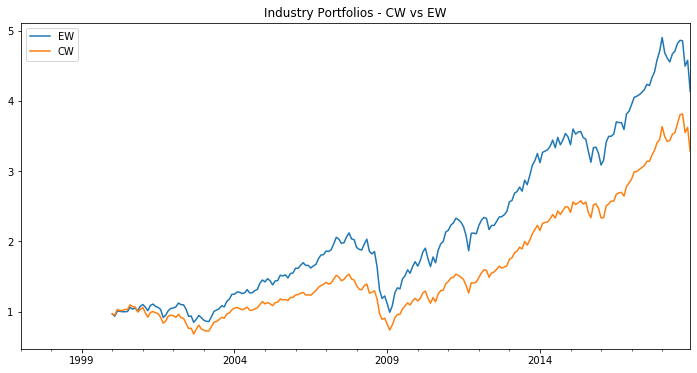

In [5]:
cwr = erk.backtest_ws(ind30_rets_97_18, estimation_window=36, weighting=erk.weight_cw, cap_weights=ind30_mcap_97_18)
ewr = erk.backtest_ws(ind30_rets_97_18, estimation_window=36, weighting=erk.weight_ew)
btr = pd.DataFrame({"EW": ewr, "CW": cwr})
(1+btr).cumprod().plot(figsize=(12,6), title="Industry Portfolios - CW vs EW")
erk.summary_stats(btr.dropna())

### Question 5

Now using the same data and same period, re-run the EW backtest but this time create a tethered EW portfolio by removing Microcap industries using a threshold of 1% and a max cap-weight multiple of 2X
What was the annualized return over the period for the tethered Equal Weighted Industry Portfolio?

### Question 6

Use the same tethered EW portfolio (by removing Microcap industries using a threshold of 1% and a max cap-weight multiple of 2X) as in the previous question.
What was the annualized volatility over the period for the tethered Equal Weighted Industry Portfolio?

,Annualized Return,Annualized Vol,Skewness,Kurtosis,Cornish-Fisher VaR (5%),Historic CVaR (5%),Sharpe Ratio,Max Drawdown
EW,0.077614,0.158685,-0.538531,5.317042,0.072485,0.106220,0.291838,-0.532980
EW-Tethered,0.076838,0.140774,-0.649872,4.664374,0.065482,0.093766,0.323653,-0.487413
CW,0.064564,0.151274,-0.552933,4.248421,0.070982,0.098269,0.222191,-0.518857


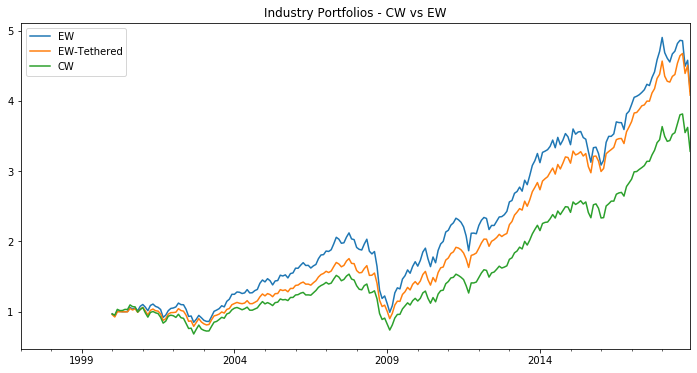

In [16]:
ewtr = erk.backtest_ws(ind30_rets_97_18, estimation_window=36, cap_weights=ind30_mcap_97_18, max_cw_mult=2, microcap_threshold=.01)
btr = pd.DataFrame({"EW": ewr, "EW-Tethered": ewtr, "CW": cwr})
(1+btr).cumprod().plot(figsize=(12,6), title="Industry Portfolios - CW vs EW")
erk.summary_stats(btr.dropna())

### Question 7

What was Tracking Error between the Pure EW (without any tethering) portfolio and the CW portfolio?

In [9]:
erk.tracking_error(ewr, cwr)

0.18736759551222992

### Question 8

Now consider the Tethered EW portfolio you previously created (by removing Microcap industries using a threshold of 1% and a max cap-weight multiple of 2X)
What was Tracking Error between the Tethered EW portfolio and the CW portfolio?

In [17]:
erk.tracking_error(ewtr, cwr)

0.1165066134512106

### Question 9

Run a backtest for the same period (1997 onwards i.e. 1997 included, 1996 not included, 2018 included), using an estimation window of 36 months as above, to build the Global Minimum Variance Portfolio by estimating the Covariance matrix using Sample Covariance. (This might take a minute or so to run depending on your computer power!)

What was the annualized return over the period for the GMV Portfolio?


### Question 10

Use the same GMV portfolio as the previous question. What was the annualized volatility over the period for the GMV Portfolio?

,Annualized Return,Annualized Vol,Skewness,Kurtosis,Cornish-Fisher VaR (5%),Historic CVaR (5%),Sharpe Ratio,Max Drawdown
EW,0.077614,0.158685,-0.538531,5.317042,0.072485,0.106220,0.291838,-0.532980
CW,0.064564,0.151274,-0.552933,4.248421,0.070982,0.098269,0.222191,-0.518857
GMV-Sample,0.066305,0.117410,-0.741081,4.469202,0.055456,0.080583,0.300810,-0.421289


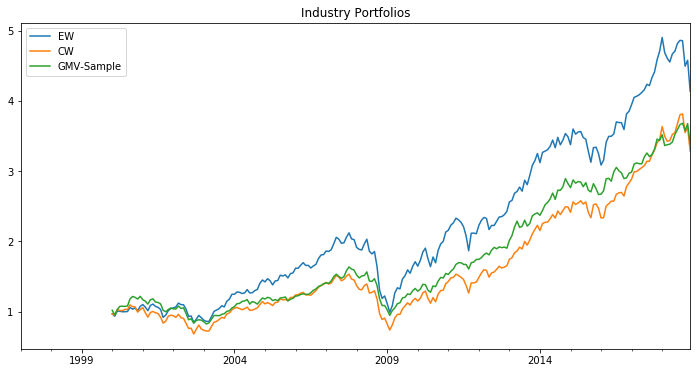

In [11]:
mv_s_r = erk.backtest_ws(ind30_rets_97_18, estimation_window=36, weighting=erk.weight_gmv, cov_estimator=erk.sample_cov)
btr = pd.DataFrame({"EW": ewr, "CW": cwr, "GMV-Sample": mv_s_r})
(1+btr).cumprod().plot(figsize=(12,6), title="Industry Portfolios")
erk.summary_stats(btr.dropna())

### Question 11

Run a backtest for the same period as the previous question, and again using an estimation window of 36 months as above, to build the Global Minimum Variance Portfolio but this time, estimating the Covariance matrix using Shrinkage between the Constant Correlation and Sample Covariance estimates using a delta of 0.25. (This might take a minute or so to run depending on your computer power!)


What was the annualized return over the period for this new Shrinkage-GMV Portfolio?

### Question 12

Using the same Shrinkage-GMV portfolio return series you used in the previous question, what was the annualized volatility over the period for the Shrinkage-GMV Portfolio?

,Annualized Return,Annualized Vol,Skewness,Kurtosis,Cornish-Fisher VaR (5%),Historic CVaR (5%),Sharpe Ratio,Max Drawdown
EW,0.077614,0.158685,-0.538531,5.317042,0.072485,0.106220,0.291838,-0.532980
CW,0.064564,0.151274,-0.552933,4.248421,0.070982,0.098269,0.222191,-0.518857
GMV-Sample,0.066305,0.117410,-0.741081,4.469202,0.055456,0.080583,0.300810,-0.421289
GMV-CC,0.074338,0.111390,-0.723783,4.153304,0.051800,0.074171,0.387279,-0.340626
GMV-Shrink 0.25,0.068466,0.114572,-0.731286,4.264940,0.053884,0.077715,0.326627,-0.393410


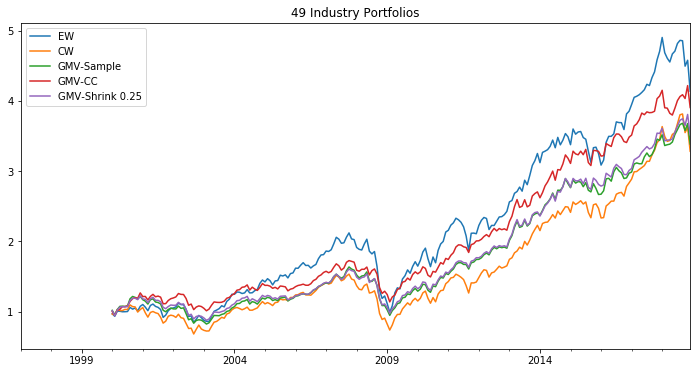

In [14]:
mv_cc_r = erk.backtest_ws(ind30_rets_97_18, estimation_window=36, weighting=erk.weight_gmv, cov_estimator=erk.cc_cov)
mv_sh_r = erk.backtest_ws(ind30_rets_97_18, estimation_window=36, weighting=erk.weight_gmv, cov_estimator=erk.shrinkage_cov, delta=0.25)
btr = pd.DataFrame({"EW": ewr, "CW": cwr, "GMV-Sample": mv_s_r, "GMV-CC": mv_cc_r, 'GMV-Shrink 0.25': mv_sh_r})
(1+btr).cumprod().plot(figsize=(12,6), title="49 Industry Portfolios")
erk.summary_stats(btr.dropna())